## Case Study : Mall Visitor Analysis

Based on mall visitor's data, the management wishes to understand the segmentation of the mall visitors and eventually will use the segmented data to do better program offer and marketing re-targetting.

Visitor's data including :
- Customer ID
- Gender
- Age
- Annual Income
- Shopping Expenditure Rating (1 = Small, 100 = Very Large)

<b> We will use K-Means Clustering to do this segmentation.

Steps on doing *K-Means Clustering*:
1.   Choose initial numbers of *cluster* (K) that wants to be established
2.   Choose random point as much as K-numbers to be the center (*centroid*) from every *clusters*
3.   From our datasets, construct closest datasets towards the *centroid* from each cluster. In total there will be K-numbers of *clusters*
4.   Run calculation and locate/calibrate new *centroid* for each *cluster*.
5.   From our datasets, calculate the closest *centroid* so that our datasets become part of the *clusters*. If there is some data that switch *clusters*, re-run again step 4 until no data switch *clusters*.

In [4]:
# Preparing numpy, pandas, matplotlib, and seaborn library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")  # activate sns with white background

In [7]:
# Opening file
df = pd.read_csv('Mall_visitors.csv')
df

,CustomerID,Gender,Age,Income_MillionIDR,Shopping_Rating (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Inline with the steps of K-Means Clustering that has been mentioned above, in this first stage, we will try to do clustering based on two (2) columns, which are *Income* and *Shopping_Rating*

In [11]:
# Choose two (2) columns which are Income and Shopping_Rating
X = df.iloc[:,3:]
X.head()

,Income_MillionIDR,Shopping_Rating (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [14]:
# Renaming column name to make it more simple
X.columns = ['Income_MioIDR', 'Shopping_Rating']
X.head()

,Income_MioIDR,Shopping_Rating
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [15]:
# Delete warning (usage of K-Means will often resulting in warning)
import warnings
warnings.filterwarnings("ignore")

In [16]:
# Use elbow method to determine suitable numbers of clusters (K).
from sklearn.cluster import KMeans

# Prepare wcss variable to store distance from clusters towards several K values.
wcss = []

# We determine K values ranging from 1 to 10 (11 as last index will not be included)
for i in range(1, 11):          
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [17]:
# See the value of wcss
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37239.83554245604,
 30273.394312070028,
 25018.576334776328,
 21850.16528258562,
 19664.68519600554]

In [19]:
# Convert wcss list into Data Frame
wcss_df = pd.DataFrame(wcss, columns=['Wcss_value'])

# Reseting index from 1
wcss_df.index = np.arange(1, len(wcss_df) + 1) 

# View wcss as DataFrame
wcss_df

,Wcss_value
1,269981.280000
2,181363.595960
3,106348.373062
4,73679.789039
5,44448.455448
6,37239.835542
7,30273.394312
8,25018.576335
9,21850.165283
10,19664.685196


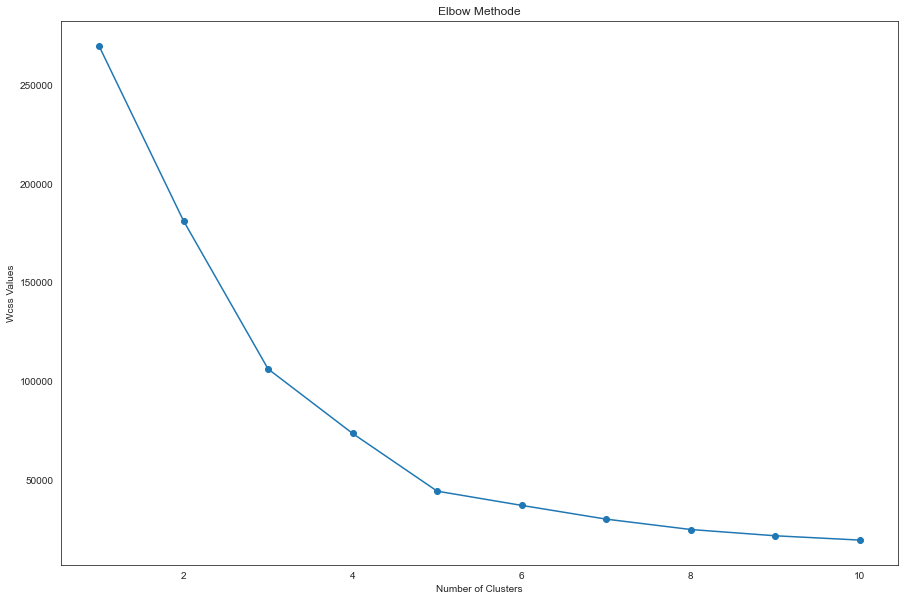

In [23]:
# Run plotting towards wcss value
plt.figure(figsize=(15,10))
plt.plot(wcss_df, marker='o')
plt.title('Elbow Methode')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss Values')
plt.show()

<b>From figure above, we can see that the elbow shape (gradient shift) is formed when the number of clusters = 3 and 5.

We can use both 3 and 5 as K-numbers. But for this calculation, we will use the bigger (maximum) K-numbers which is 5 and run K-Means clustering towards the existing dataset.

In [31]:
# Run K-Means Clustering towards dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [33]:
# Add y_kmeans as new column on the dataframe (df)
df['Cluster']=y_kmeans
df.head()

,CustomerID,Gender,Age,Income_MillionIDR,Shopping_Rating (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,1
2,3,Female,20,16,6,3
3,4,Female,23,16,77,1
4,5,Female,31,17,40,3


In [36]:
# To determine the *centroid* position from each *cluster* we use cluster_centroid_
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

Now, we will try to visualize the *clusters* where **X-axis** = **Income** and **Y-axis** = **Shopping_Rating**

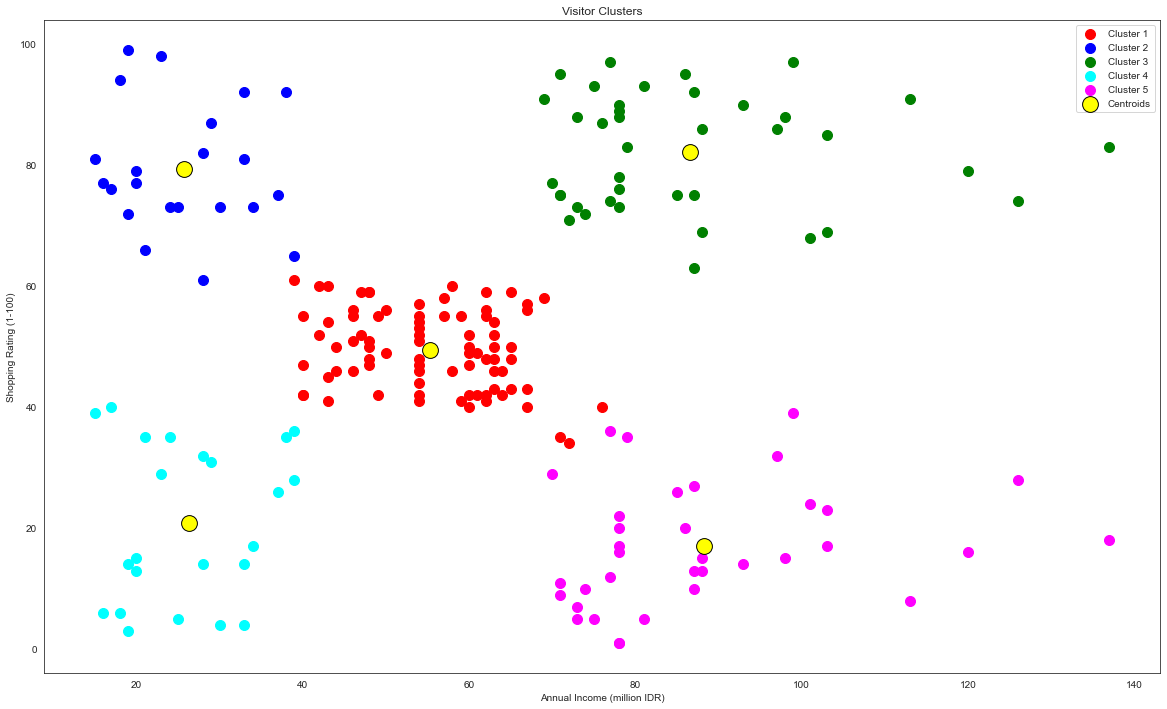

In [38]:
# Visualization
plt.figure(figsize=(20,12))
plt.scatter(X.iloc[y_kmeans == 0, 0], X.iloc[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X.iloc[y_kmeans == 1, 0], X.iloc[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X.iloc[y_kmeans == 2, 0], X.iloc[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X.iloc[y_kmeans == 3, 0], X.iloc[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X.iloc[y_kmeans == 4, 0], X.iloc[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 250, c = 'yellow', edgecolors='black', label = 'Centroids')
plt.title('Visitor Clusters')
plt.xlabel('Annual Income (million IDR)')
plt.ylabel('Shopping Rating (1-100)')
plt.legend()
plt.show()

<b> Based on the figure above, we can see that clustering of the datasets is already good, which can be seen from the density of each cluster and the distance among each cluster is also wide. Therefore, we can use these five (5) clusters as the segmentation of visitor of the mall. 

The next step is to discuss this finding to the management for follow up programs. Based on the figure, we could define the clusters as below :

- <b> High shopping spending is driven by visitors in both clusters 2 (blue) and 3(green). Special note here is for cluster 2, eventhough they have lower annual income, they still maintain their "lifestyle of shopping". Therefore, higher chances that they use installment as their preferred payment method.
    

- <b> Low shopping spending is driven by visitors in both clusters 4 (light blue) and 5(purple). Cluster 4 hypothethically can be classified as price sensitive visitors as they have lower income level. Big opportunity lies on cluster 5, in which they have big annual income but still low shopping spending, indicating that they might have primary shopping channel outside the mall (can be online or other malls).